In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Pick a random number generator for reproducibility

rng = np.random.default_rng(666)

x = np.array([0.1,0.15,0.3,0.5,0.8,1.0])
y = 1.4*x + 0.3
y += 0.05*rng.standard_normal(6)

In [3]:
#Some non-linear data
N_tot = 20
x = np.linspace(0,5,N_tot)
x += 0.05*rng.standard_normal(N_tot)

#y = -1.0*x**3 + 1.*x**2 + 1.4*x + 0.3
y = np.exp(-(x-1.)**2/1.0) - np.exp(-(x-2.5)**2/3.0) + np.exp(-(x-4.0)**2/0.5)
y += 0.1*rng.standard_normal(N_tot)

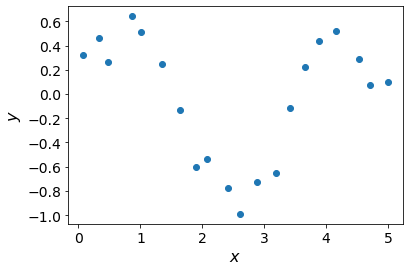

In [4]:
plt.scatter(x,y)

#formating
#plt.xlim([0.0,2])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig('kernels_data_1d_nonlin.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [5]:
def train_val_split(x,y,N_val=5,seed=666):
    np.random.seed(seed) 
    N_tot = x.shape[0]
    N_train = N_tot-N_val
    indices = np.arange(1,N_tot-1)
    np.random.shuffle(indices)
    # make sure that first and last point are included in the training set
    # this avoids diverging behavior of polynomial fits
    indices = np.insert(indices,[0,0],[0,N_tot-1])
#    indices = np.append(indices,[N_tot-1])    
    x_train = x[indices[:N_train]]
    y_train = y[indices[:N_train]]
    x_val   = x[indices[N_train:]]
    y_val   = y[indices[N_train:]]
    return x_train,y_train,x_val,y_val

In [6]:
x_train,y_train,x_val,y_val = train_val_split(x,y,N_val=5,seed=666)


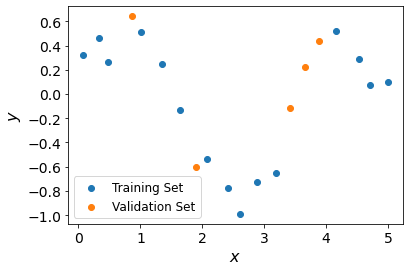

In [7]:
x_range = np.linspace(0,2,)

plt.scatter(x_train,y_train,label="Training Set")
plt.scatter(x_val,y_val,label="Validation Set")

validation_loss = []
training_loss   = []

#perform N_val_runs validation runs
N_val_runs = 10

#formating
#plt.xlim([0.0,2])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.legend(fontsize=12)
plt.savefig('kernels_reg_data_1d_nonlin_train_val.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

/home/margraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43689e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


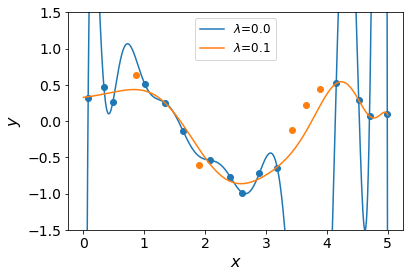

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val)

degree = 14
reg = 0.0

x_plot = np.linspace(0,5,500)

for reg in [0.0,0.1]:
    label = f'$\lambda$={reg}'
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    x_val_poly = poly.fit_transform(x_val.reshape(-1, 1))
    x_plot_poly = poly.fit_transform(x_plot.reshape(-1, 1))

    ridge_regressor = Ridge(alpha=reg)
    res = ridge_regressor.fit(x_train_poly,y_train)
    y_plot = ridge_regressor.predict(x_plot_poly)

#plt.scatter(x_train,y_train,label="Training Set")
#plt.scatter(x_val,y_val,label="Validation Set")
    plt.plot(x_plot,y_plot,label=label)

plt.ylim([-1.5,1.5])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.legend(fontsize=12)
plt.savefig('kernels_ridge_polynomial.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()


/home/margraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.73508e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/margraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.3268e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/margraf/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54087e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


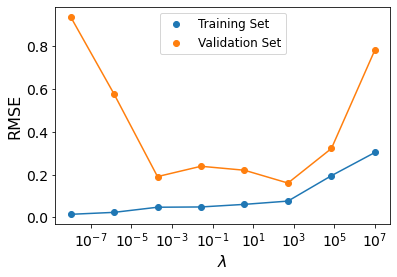

In [9]:
reg_strength = np.logspace(-8,7,8)
train_error = []
val_error = []

for reg in reg_strength:
    #label = f'$\lambda$={reg}'
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    x_val_poly = poly.fit_transform(x_val.reshape(-1, 1))
    x_plot_poly = poly.fit_transform(x_plot.reshape(-1, 1))

    ridge_regressor = Ridge(alpha=reg)
    res = ridge_regressor.fit(x_train_poly,y_train)
    y_plot = ridge_regressor.predict(x_plot_poly)
    pred_train = ridge_regressor.predict(x_train_poly)
    pred_val = ridge_regressor.predict(x_val_poly)
    train_error.append(np.mean(np.abs(pred_train-y_train)))
    val_error.append(np.mean(np.abs(pred_val-y_val)))
    
#plt.scatter(x_train,y_train,label="Training Set")
#plt.scatter(x_val,y_val,label="Validation Set")
    #plt.plot(x_plot,y_plot,label=label)



plt.scatter(reg_strength,train_error,label="Training Set")
plt.plot(reg_strength,train_error)

plt.scatter(reg_strength,val_error,label="Validation Set")
plt.plot(reg_strength,val_error)

#formating
#plt.xlim([0.0,2])
#plt.ylim([0.0,2.0])
plt.xlabel('$\lambda$',fontsize=16)
plt.ylabel('RMSE',fontsize=16)
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12)
plt.savefig('kernels_rdige_train_val_loss.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [10]:
print(x_train_poly.shape)

(15, 15)


In [11]:
dimensions = [1,2,4,8]
n_features = []
for dimension in dimensions:
    n_f_temp = []
    for degree in np.arange(12):
    #label = f'$\lambda$={reg}'
        X = np.zeros((10,dimension))
        poly = PolynomialFeatures(degree)
        n_f_temp.append(poly.fit(X).n_output_features_)
    n_features.append(n_f_temp)
        #print(degree,dimension,poly.fit(X).n_output_features_)
        

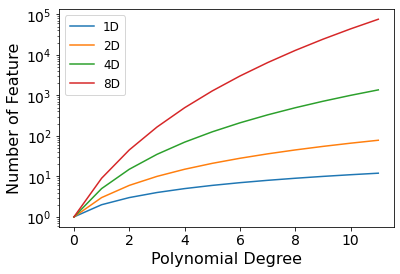

In [12]:
for i,dimension in enumerate(dimensions):
    label = f"{dimension}D"
    plt.plot(np.arange(12),n_features[i],label=label)
plt.yscale('log')
plt.xlabel('Polynomial Degree',fontsize=16)
plt.ylabel('Number of Feature',fontsize=16)
#plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12)
plt.savefig('kernels_ridge_number_of_features.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

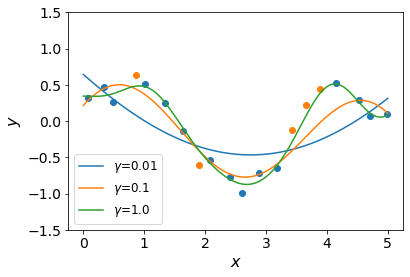

In [13]:
from sklearn.kernel_ridge import KernelRidge

plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val)

degree = 14
reg = 0.0

x_plot = np.linspace(0,5,500)

reg = 0.002

for gamma in [0.01,0.1,1.0]:
    label = f'$\gamma$={gamma}'
    #poly = PolynomialFeatures(degree)
    #x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    #x_val_poly = poly.fit_transform(x_val.reshape(-1, 1))
    #x_plot_poly = poly.fit_transform(x_plot.reshape(-1, 1))

    krr_regressor = KernelRidge(alpha=reg,kernel='rbf',gamma=gamma)
    res = krr_regressor.fit(x_train.reshape(-1, 1),y_train)
    y_plot = krr_regressor.predict(x_plot.reshape(-1, 1))

#plt.scatter(x_train,y_train,label="Training Set")
#plt.scatter(x_val,y_val,label="Validation Set")
    plt.plot(x_plot,y_plot,label=label)

plt.ylim([-1.5,1.5])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.legend(fontsize=12)
plt.savefig('kernels_krr_rbf.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()


0.42594085132295484 0.0001 0.0001
0.40350829467103927 0.0001 0.03199267137797385
0.35832760028787086 0.0001 0.03853528593710531
0.3213636422870156 0.0001 0.04641588833612782
0.2968504800849079 0.0001 0.055908101825122285
0.2826023190386341 0.0001 0.06734150657750829
0.27206641969447426 0.0001 0.08111308307896872
0.2572411394656104 0.0001 0.09770099572992257
0.23360940529818391 0.0001 0.1176811952434999
0.20512190096034472 0.0001 0.14174741629268062
0.1810372605616319 0.0001 0.1707352647470692
0.16386716696197007 0.0001 0.20565123083486536
0.15104478623397635 0.0001 0.24770763559917114
0.14091396567485542 0.0001 0.298364724028334
0.132851556110197 0.0001 0.3593813663804629
0.1299392923312926 0.0001 0.43287612810830617
0.1293056087510511 0.00012045035402587823 0.43287612810830617
0.128955173525711 0.000145082877849594 0.43287612810830617
0.1288214653951148 0.000145082877849594 0.521400828799969
0.1276314651056485 0.0001747528400007683 0.521400828799969
0.12664656739657443 0.0002104904144

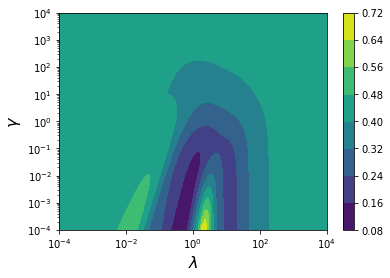

In [70]:
reg_strength = np.logspace(-4,4,100)
gammas       = np.logspace(-4,4,100)

rr,gg        = np.meshgrid(reg_strength,gammas)


train_error = []
val_error = np.zeros((100,100))

min_val_error = 1e6
for i,reg in enumerate(reg_strength):
    for j,gamma in enumerate(gammas):
        #label = f'$\gamma$={gamma}'
        krr_regressor = KernelRidge(alpha=reg,kernel='rbf',gamma=gamma)
        res = krr_regressor.fit(x_train.reshape(-1, 1),y_train)
        y_pred = krr_regressor.predict(x_val.reshape(-1, 1))
        e_val = np.mean(np.abs(y_pred-y_val))
        val_error[i,j] = np.mean(np.abs(y_pred-y_val))
        if e_val < min_val_error:
            print(e_val,reg,gamma)
            min_val_error = e_val
        #y_plot = krr_regressor.predict(x_plot.reshape(-1, 1))
        #plt.plot(x_plot,y_plot,label=label)

#print(val_error)
h = plt.contourf(rr, gg, val_error)#,levels=np.linspace(0.0,10,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()        

plt.xscale('log')
plt.yscale('log')
#plt.ylim([-1.5,1.5])
plt.xlabel('$\lambda$',fontsize=16)
plt.ylabel('$\gamma$',fontsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)


#plt.legend(fontsize=12)
#plt.savefig('kernels_krr_rbf.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()


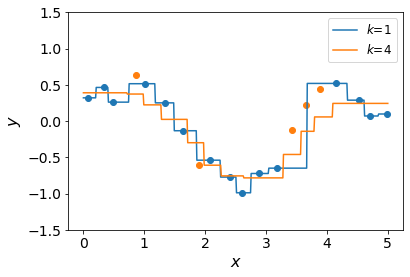

In [14]:
from sklearn.neighbors import KNeighborsRegressor

plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val)

degree = 14
reg = 0.0

x_plot = np.linspace(0,5,500)

reg = 0.002

for k in [1,4]:
    label = f'$k$={k}'
    #poly = PolynomialFeatures(degree)
    #x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    #x_val_poly = poly.fit_transform(x_val.reshape(-1, 1))
    #x_plot_poly = poly.fit_transform(x_plot.reshape(-1, 1))

    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    res = knn_regressor.fit(x_train.reshape(-1, 1),y_train)
    y_plot = knn_regressor.predict(x_plot.reshape(-1, 1))

#plt.scatter(x_train,y_train,label="Training Set")
#plt.scatter(x_val,y_val,label="Validation Set")
    plt.plot(x_plot,y_plot,label=label)

plt.ylim([-1.5,1.5])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.legend(fontsize=12)
plt.savefig('kernels_knn.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

In [15]:
import pandas as pd

In [16]:
df = pd.read_hdf("./dataframe.h5")

In [31]:
def dataloader_energies(df):
    X = np.array([seq_to_onehot(row['Sequence']) for ind, row in df.iterrows()])
    Energies = np.array([row['E_Min'] for ind, row in df.iterrows()])
    return X, Energies

from sklearn.feature_extraction.text import CountVectorizer

def dataloader_ngram(df,ngrams=4):
    seq_list = [row['Sequence'] for ind, row in df.iterrows()]
    count_vect = CountVectorizer(ngram_range=(1, ngrams),analyzer='char')
    X = count_vect.fit_transform(seq_list)
    Energies = np.array([row['E_Min'] for ind, row in df.iterrows()])
    return X, Energies

def seq_to_onehot(seq,N_max=12):
    seq = seq.ljust(N_max)
    encoding = np.zeros((N_max,3))
    for i,S in enumerate(seq):
        if S=='A':
            encoding[i,0] = 1.
        elif S=='B':
            encoding[i,1] = 1.
        elif S==' ':
            encoding[i,2] = 1.
    return encoding.flatten()

In [25]:
X, Y = dataloader_energies(df)
print(X.shape, Y.shape)

(4216, 36) (4216,)


In [37]:
X_ngram, Y_ngram = dataloader_ngram(df,ngrams=3)
print(X_ngram.shape)

(4216, 14)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X, Y, train_size=3000, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_valtest, Y_valtest, train_size=256, random_state=42)

X_ngram_train, X_ngram_valtest, Y_ngram_train, Y_ngram_valtest = train_test_split(X_ngram, Y_ngram, train_size=3000, random_state=42)
X_ngram_val, X_ngram_test, Y_ngram_val, Y_ngram_test = train_test_split(X_ngram_valtest, Y_ngram_valtest, train_size=256, random_state=42)

In [39]:
print(X_train.shape)
print(X_val.shape)

(3000, 36)
(256, 36)


In [59]:
reg_strength = np.logspace(-5,-1,25)
gammas       = np.logspace(-3,0,25)

rr,gg        = np.meshgrid(reg_strength,gammas)


train_error = []
val_error = np.zeros((25,25))

min_val_error = 1e6
for i,reg in enumerate(reg_strength):
    for j,gamma in enumerate(gammas):
        #label = f'$\gamma$={gamma}'
        krr_regressor = KernelRidge(alpha=reg,kernel='rbf',gamma=gamma)
        res = krr_regressor.fit(X_train,Y_train)
        Y_pred = krr_regressor.predict(X_val)
        e_val = np.mean(np.abs(Y_pred-Y_val))
        val_error[i,j] = np.mean(np.abs(Y_pred-Y_val))
        if e_val < min_val_error:
            print(e_val,reg,gamma)
            min_val_error = e_val
            min_reg = reg
            min_gamma = gamma
        #y_plot = krr_regressor.predict(x_plot.reshape(-1, 1))
        #plt.plot(x_plot,y_plot,label=label)
print(min_reg,min_gamma)
#print(val_error)



0.2778437321369992 1e-05 0.001
0.24479058428092818 1e-05 0.001333521432163324
0.21516102260542946 1e-05 0.0017782794100389228
0.19522358526486588 1e-05 0.0023713737056616554
0.18698879590287965 1e-05 0.0031622776601683794
0.18519044376014213 1e-05 0.004216965034285823
0.1848521664696271 1e-05 0.005623413251903491
0.18476866900852185 1.4677992676220705e-05 0.005623413251903491
0.18470712211051163 2.1544346900318823e-05 0.005623413251903491
0.18453854928490027 2.1544346900318823e-05 0.007498942093324558
0.18433207466932766 3.1622776601683795e-05 0.007498942093324558
0.18416997762097023 4.641588833612782e-05 0.007498942093324558
0.18394506185446857 6.812920690579608e-05 0.01
0.1836544802795853 0.0001 0.01
0.18353750341681763 0.0001467799267622069 0.01
0.18319982690871484 0.00021544346900318823 0.01333521432163324
0.18289429433381235 0.00031622776601683794 0.01333521432163324
0.1828020263587743 0.00046415888336127773 0.01778279410038923
0.18239139738325746 0.0006812920690579609 0.017782794

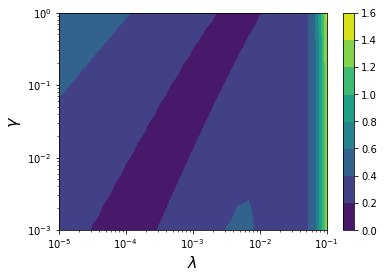

In [61]:
h = plt.contourf(rr, gg, val_error) #,levels=np.linspace(0.0,10,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
#plt.scatter([0.0014677992676220691], [0.023713737056616554],c='r')
plt.colorbar()        

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$\lambda$',fontsize=16)
plt.ylabel('$\gamma$',fontsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)


#plt.legend(fontsize=12)
plt.savefig('kernels_krr_rbf_tinyfold_scan.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

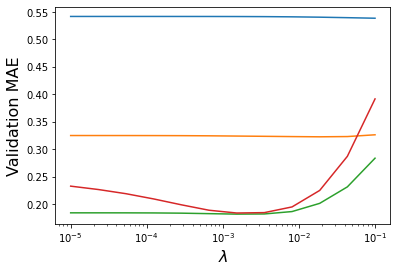

In [54]:
reg_strength = np.logspace(-5,-1,12)
#gammas       = np.logspace(-3,0,10)

#rr,gg        = np.meshgrid(reg_strength,gammas)


train_error = []
val_error_krr = np.zeros((4,12))
#val_error_rr = np.zeros((12))

min_regs_one_hot = []

min_val_error_krr = 1e6
min_val_error_rr = 1e6

for ideg,degree in enumerate([1,2,3,4]):
    for i,reg in enumerate(reg_strength):      
        #label = f'$\gamma$={gamma}'
        krr_regressor = KernelRidge(alpha=reg,kernel='polynomial',coef0=0,degree=degree)

        res = krr_regressor.fit(X_train,Y_train)
        Y_pred_krr = krr_regressor.predict(X_val)
        e_val_krr = np.mean(np.abs(Y_pred_krr-Y_val))
        val_error_krr[ideg,i] = np.mean(np.abs(Y_pred_krr-Y_val))
        #val_error_rr[i] = np.mean(np.abs(Y_pred_rr-Y_val))


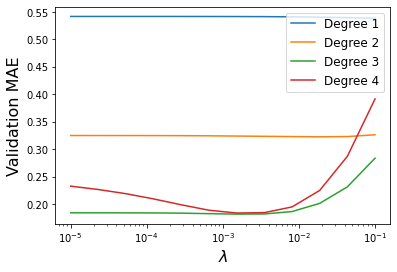

In [58]:
for ideg,degree in enumerate([1,2,3,4]):
    label = f'Degree {degree}'
    plt.plot(reg_strength,val_error_krr[ideg],label=label)
#plt.plot(reg_strength,val_error_rr)

plt.xscale('log')
#plt.yscale('log')
#plt.ylim([-1.5,1.5])
plt.xlabel('$\lambda$',fontsize=16)
plt.ylabel('Validation MAE',fontsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)


plt.legend(fontsize=12)
plt.savefig('kernels_krr_poly_tinyfold.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

In [62]:
reg_strength = np.logspace(-5,-1,10)
#gammas       = np.logspace(-3,0,10)

#rr,gg        = np.meshgrid(reg_strength,gammas)


train_error = []
val_error = np.zeros((6,10))
min_regs_one_hot = []

min_val_error = 1e6
for itrain,n_train in enumerate([100,250,500,1000,1500,3000]):
    print(n_train)
    min_val_error = 1e6
    for i,reg in enumerate(reg_strength):      
        #label = f'$\gamma$={gamma}'
        krr_regressor = KernelRidge(alpha=reg,kernel='polynomial',coef0=0,degree=3)
        res = krr_regressor.fit(X_train[:n_train,:],Y_train[:n_train])
        Y_pred = krr_regressor.predict(X_val)
        e_val = np.mean(np.abs(Y_pred-Y_val))
        val_error[itrain,i] = np.mean(np.abs(Y_pred-Y_val))
        if e_val < min_val_error:
            print(e_val,reg)
            min_val_error = e_val
            min_reg = reg
    min_regs_one_hot.append(min_reg)
            #y_plot = krr_regressor.predict(x_plot.reshape(-1, 1))
            #plt.plot(x_plot,y_plot,label=label)


100
0.5978551862823928 1e-05
0.5977643700539071 2.782559402207126e-05
0.597531609996163 7.742636826811278e-05
0.5970734641065704 0.00021544346900318823
250
0.39690082783286196 1e-05
0.3916128209602785 2.782559402207126e-05
0.3803043382648754 7.742636826811278e-05
0.3637693142725945 0.00021544346900318823
0.35215048022918943 0.0005994842503189409
500
0.4919598367101591 1e-05
0.41662862667115874 2.782559402207126e-05
0.353290963314577 7.742636826811278e-05
0.3054257808466242 0.00021544346900318823
0.27168768814010164 0.0005994842503189409
0.25680327318596363 0.0016681005372000592
1000
0.23240938787232324 1e-05
0.2279635174033136 2.782559402207126e-05
0.22342366289251936 7.742636826811278e-05
0.22020385700792663 0.00021544346900318823
0.21629103222243268 0.0005994842503189409
0.21542256187384415 0.0016681005372000592
1500
0.21259193912897284 1e-05
0.20997630895767483 2.782559402207126e-05
0.20690031084454938 7.742636826811278e-05
0.20290630758455194 0.00021544346900318823
0.19824136543887

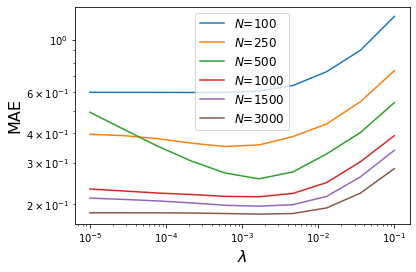

In [66]:
ntrains = [100,250,500,1000,1500,3000]
for itrain in range(6):
    label = f'$N$={ntrains[itrain]}'
    plt.plot(reg_strength,val_error[itrain,:],label=label)#,levels=np.linspace(0.0,10,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))

plt.xscale('log')
plt.yscale('log')
#plt.ylim([-1.5,1.5])
plt.xlabel('$\lambda$',fontsize=16)
plt.ylabel('MAE',fontsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)


plt.legend(fontsize=12)
plt.savefig('kernels_krr_tinyfold_train_dependence.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

0.1653864788991486


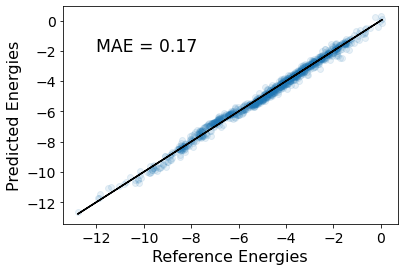

In [95]:
krr_regressor = KernelRidge(alpha=0.0016681005372000592,kernel='polynomial',degree=3,coef0=0)
res = krr_regressor.fit(X_train,Y_train)
Y_pred_test = krr_regressor.predict(X_test)
plt.scatter(Y_test,Y_pred_test,alpha=0.1)
plt.plot(Y_test,Y_test,c='k')
MAE = np.mean(np.abs(Y_test-Y_pred_test))
print(MAE)

plt.text(-12,-2,f'MAE = 0.17',fontsize='xx-large')

#formating
#plt.xlim([0.0,1.5])
#plt.yscale('log')
plt.xlabel('Reference Energies',fontsize=16)
plt.ylabel('Predicted Energies',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('kernels_krr_test_set_correlation_plot.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)


plt.show()

0.14524923086741356


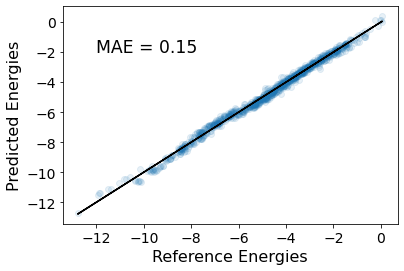

In [85]:
krr_regressor = KernelRidge(alpha=1e-05,kernel='polynomial',degree=3,coef0=0)
res = krr_regressor.fit(X_ngram_train,Y_ngram_train)
Y_pred_test = krr_regressor.predict(X_ngram_test)
plt.scatter(Y_ngram_test,Y_pred_test,alpha=0.1)
plt.plot(Y_test,Y_test,c='k')
MAE = np.mean(np.abs(Y_test-Y_pred_test))
print(MAE)

plt.text(-12,-2,f'MAE = 0.15',fontsize='xx-large')

#formating
#plt.xlim([0.0,1.5])
#plt.yscale('log')
plt.xlabel('Reference Energies',fontsize=16)
plt.ylabel('Predicted Energies',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.show()

0.5303155989558201


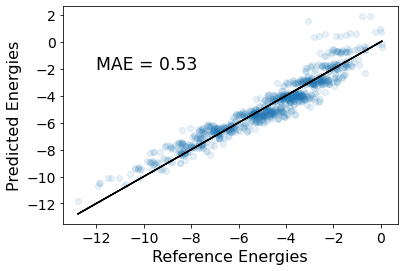

In [89]:
krr_regressor = KernelRidge(alpha=0.0016681005372000592,kernel='polynomial',degree=1,coef0=0)
res = krr_regressor.fit(X_train,Y_train)
Y_pred_test = krr_regressor.predict(X_test)
plt.scatter(Y_test,Y_pred_test,alpha=0.1)
plt.plot(Y_test,Y_test,c='k')
MAE = np.mean(np.abs(Y_test-Y_pred_test))
print(MAE)

plt.text(-12,-2,f'MAE = 0.53',fontsize='xx-large')

#formating
#plt.xlim([0.0,1.5])
#plt.yscale('log')
plt.xlabel('Reference Energies',fontsize=16)
plt.ylabel('Predicted Energies',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.show()

0.3011414130548083


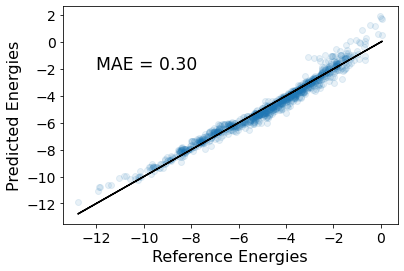

In [88]:
krr_regressor = KernelRidge(alpha=0.0016681005372000592,kernel='polynomial',degree=1,coef0=0)
res = krr_regressor.fit(X_ngram_train,Y_ngram_train)
Y_pred_test = krr_regressor.predict(X_ngram_test)
plt.scatter(Y_test,Y_pred_test,alpha=0.1)
plt.plot(Y_test,Y_test,c='k')
MAE = np.mean(np.abs(Y_test-Y_pred_test))
print(MAE)

plt.text(-12,-2,f'MAE = 0.30',fontsize='xx-large')

#formating
#plt.xlim([0.0,1.5])
#plt.yscale('log')
plt.xlabel('Reference Energies',fontsize=16)
plt.ylabel('Predicted Energies',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.show()

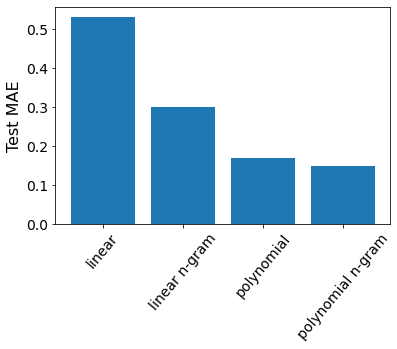

In [94]:
models = ['linear','linear n-gram','polynomial','polynomial n-gram']
model_MAEs = [0.53,0.3,0.17,0.15]
plt.bar(models,model_MAEs)

#formating
#plt.xlim([0.0,1.5])
#plt.yscale('log')
#plt.xlabel('Reference Energies',fontsize=16)
plt.ylabel('Test MAE',fontsize=16)
plt.xticks(fontsize=14,rotation=50)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

plt.savefig('kernels_krr_tinyfold_models_reps.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

100
0.638232972329098 1e-05
0.6315155683483407 3.511191734215127e-05
0.6113287266775911 0.0001232846739442066
0.5595459852694111 0.0004328761281083057
0.47270417638113865 0.0015199110829529332
0.39636976305857796 0.005336699231206307
0.3774125398537154 0.01873817422860383
0.35435193061312914 0.06579332246575675
0.33238106913343296 0.2310129700083158
250
0.4447806183014167 1e-05
0.42886583801628797 3.511191734215127e-05
0.40930890635413886 0.0001232846739442066
0.384426597355728 0.0004328761281083057
0.34762849629832465 0.0015199110829529332
0.29987251315708663 0.005336699231206307
0.25730805098810655 0.01873817422860383
0.24466285017842965 0.06579332246575675
500
0.31065272226753715 1e-05
0.28654487118217287 3.511191734215127e-05
0.2608148597290305 0.0001232846739442066
0.23587225812686846 0.0004328761281083057
0.21325934899875051 0.0015199110829529332
0.20157226719915475 0.005336699231206307
0.1942557743278016 0.01873817422860383
0.19253757507790614 0.06579332246575675
1000
0.19113469

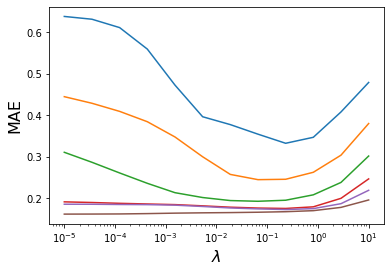

In [41]:
reg_strength = np.logspace(-5,1,12)
#gammas       = np.logspace(-3,0,10)

#rr,gg        = np.meshgrid(reg_strength,gammas)


train_error = []
val_error = np.zeros((6,12))
min_regs = []

min_val_error = 1e6
for itrain,n_train in enumerate([100,250,500,1000,1500,3000]):
    print(n_train)
    min_val_error = 1e6
    for i,reg in enumerate(reg_strength):      
        #label = f'$\gamma$={gamma}'
        krr_regressor = KernelRidge(alpha=reg,kernel='polynomial',coef0=0,degree=3)
        res = krr_regressor.fit(X_ngram_train[:n_train,:],Y_ngram_train[:n_train])
        Y_ngram_pred = krr_regressor.predict(X_ngram_val)
        e_val = np.mean(np.abs(Y_ngram_pred-Y_ngram_val))
        val_error[itrain,i] = np.mean(np.abs(Y_ngram_pred-Y_ngram_val))
        if e_val < min_val_error:
            print(e_val,reg)
            min_val_error = e_val
            min_reg = reg
            #y_plot = krr_regressor.predict(x_plot.reshape(-1, 1))
            #plt.plot(x_plot,y_plot,label=label)
    min_regs.append(min_reg)
#print(val_error)
for itrain in range(6):
    plt.plot(reg_strength,val_error[itrain,:])#,levels=np.linspace(0.0,10,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))

plt.xscale('log')
#plt.yscale('log')
#plt.ylim([-1.5,1.5])
plt.xlabel('$\lambda$',fontsize=16)
plt.ylabel('MAE',fontsize=16)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)


#plt.legend(fontsize=12)
#plt.savefig('kernels_krr_rbf.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

100 0.33463833781988844
250 0.21241692858780456
500 0.17435047329369194
1000 0.15718422616351335
1500 0.15212161687031733
3000 0.14524923086741356


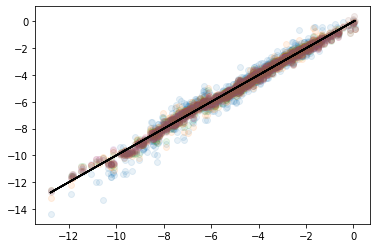

In [42]:
KRR_ngram_MAEs = []
for itrain,n_train in enumerate([100,250,500,1000,1500,3000]):
    krr_regressor = KernelRidge(alpha=min_regs[itrain],kernel='polynomial',degree=3,coef0=0)
    res = krr_regressor.fit(X_ngram_train[:n_train,:],Y_ngram_train[:n_train])
    Y_pred_test = krr_regressor.predict(X_ngram_test)
    plt.scatter(Y_ngram_test,Y_pred_test,alpha=0.1)
    plt.plot(Y_ngram_test,Y_ngram_test,c='k')
    MAE = np.mean(np.abs(Y_ngram_test-Y_pred_test))
    KRR_ngram_MAEs.append(MAE)
    print(n_train,MAE)

100 1.7720991288822907
250 0.649846759385301
500 0.464909988626517
1000 0.525932035649179
1500 0.4386029932976944
3000 0.16920702544254926


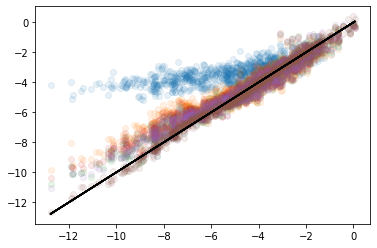

In [44]:
KRR_MAEs = []
for itrain,n_train in enumerate([100,250,500,1000,1500,3000]):
    krr_regressor = KernelRidge(alpha=min_regs[itrain],kernel='polynomial',degree=3,coef0=0)
    res = krr_regressor.fit(X_train[:n_train,:],Y_train[:n_train])
    Y_pred_test = krr_regressor.predict(X_test)
    plt.scatter(Y_test,Y_pred_test,alpha=0.1)
    plt.plot(Y_test,Y_test,c='k')
    MAE = np.mean(np.abs(Y_test-Y_pred_test))
    KRR_MAEs.append(MAE)
    print(n_train,MAE)

In [48]:
NN_MAEs = ([0.48231876, 0.3315356,  0.2567679,  0.17163372, 0.1457538,  0.10554029])

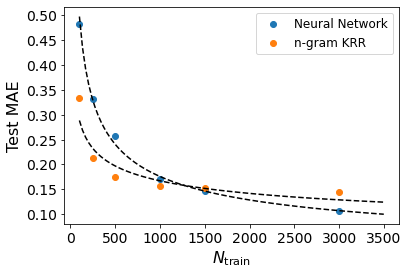

In [82]:
train_sizes = np.array([100,250,500,1000,1500,3000])

plt.scatter(train_sizes,NN_MAEs,label='Neural Network')

from scipy.stats import linregress 
fitresults_NN = linregress(np.log2(train_sizes),np.log2(NN_MAEs))
nspace = np.linspace(100,3500,100)

plt.plot(nspace,nspace**fitresults_NN.slope*2**fitresults_NN.intercept,c='k',linestyle='--')


plt.scatter(train_sizes,KRR_ngram_MAEs,label='n-gram KRR')

fitresults_KRR_ngram = linregress(np.log2(train_sizes),np.log2(KRR_ngram_MAEs))
nspace = np.linspace(100,3500,100)

plt.plot(nspace,nspace**fitresults_KRR_ngram.slope*2**fitresults_KRR_ngram.intercept,c='k',linestyle='--')

#plt.plot([500,1000,1500,3000],[MAE_500,MAE_1000,MAE_1500,MAE_3000])

#formating
#plt.ylim([1e-2,3])
#plt.xscale('log',base=10)
#plt.yscale('log',base=10)

plt.xlabel('$N_\mathrm{train}$',fontsize=16)
plt.ylabel('Test MAE',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.savefig('kernels_learning_curve_test_vs_ntrain.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

In [103]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2,kernel='polynomial',degree=3,coef0=0)
X_transformed = transformer.fit_transform(X_ngram_train)
print(X_transformed.shape)

(3000, 2)


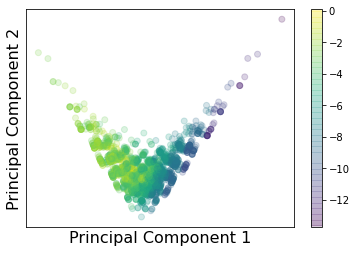

In [104]:
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=Y_ngram_train,alpha=0.2)

plt.xlabel('Principal Component 1',fontsize=16)
plt.ylabel('Principal Component 2',fontsize=16)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14)
plt.colorbar()
#plt.legend(fontsize=12)

plt.savefig('kernels_kpca_ngram.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()

(3000, 2)


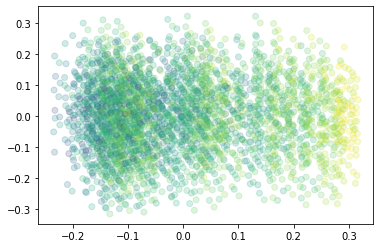

In [80]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2,kernel='polynomial',degree=1,coef0=0)
X_transformed = transformer.fit_transform(X_train)
print(X_transformed.shape)

plt.scatter(X_transformed[:,0],X_transformed[:,1],c=Y_train,alpha=0.2)

In [100]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2,kernel='polynomial',degree=3,coef0=0)
X_transformed = transformer.fit_transform(X_train)
print(X_transformed.shape)



(3000, 2)


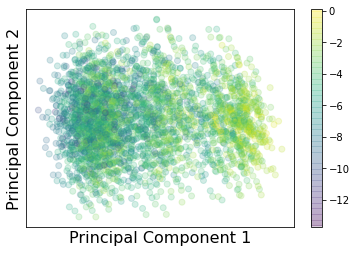

In [102]:
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=Y_train,alpha=0.2)

plt.xlabel('Principal Component 1',fontsize=16)
plt.ylabel('Principal Component 2',fontsize=16)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14)
plt.colorbar()
#plt.legend(fontsize=12)

plt.savefig('kernels_kpca_onehot.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()